<a href="https://colab.research.google.com/github/eleurent/IGNite/blob/master/IGNite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Imports
!apt-get -qq install -y gdal-bin libgdal-dev
!pip install GDAL==`gdal-config --version`

!git clone https://github.com/eleurent/IGNite.git
%cd IGNite
!pip install -r requirements.txt

import numpy as np
from pathlib import Path
from backend import ign, cyclosm

Selecting previously unselected package python3-numpy.
(Reading database ... 121918 files and directories currently installed.)
Preparing to unpack .../python3-numpy_1%3a1.21.5-1ubuntu22.04.1_amd64.deb ...
Unpacking python3-numpy (1:1.21.5-1ubuntu22.04.1) ...
Selecting previously unselected package python3-gdal.
Preparing to unpack .../python3-gdal_3.6.4+dfsg-1~jammy0_amd64.deb ...
Unpacking python3-gdal (3.6.4+dfsg-1~jammy0) ...
Selecting previously unselected package gdal-bin.
Preparing to unpack .../gdal-bin_3.6.4+dfsg-1~jammy0_amd64.deb ...
Unpacking gdal-bin (3.6.4+dfsg-1~jammy0) ...
Setting up python3-numpy (1:1.21.5-1ubuntu22.04.1) ...
Setting up python3-gdal (3.6.4+dfsg-1~jammy0) ...
Setting up gdal-bin (3.6.4+dfsg-1~jammy0) ...
Processing triggers for man-db (2.10.2-1) ...
Cloning into 'IGNite'...
remote: Enumerating objects: 305, done.
remote: Counting objects: 100% (144/144), done.
remote: Compressing objects: 100% (102/102), done.
remote: Total 305 (delta 73), reused 95 (de

In [2]:
#@title Run IGNite
backend = 'cyclosm' # @param ["cyclosm", "ign"]
upper_left = 45.707762, 6.595700  #@param
lower_right = 45.664351, 6.665738  #@param
zoom = 15  #@param {"type": "integer"}
jpg_quality = 95  #@param {type:"slider", min:0, max:100, step:1}
processes = 4  #@param {"type": "integer"}
filename = 'out' #@param {"type": "string"}

no_caching = False
cache_folder = 'cache'


tiled_map_class = {'cyclosm': cyclosm.CyclOSMMap, 'ign': ign.IGNMap}[backend]
tiled_map = tiled_map_class(
    min_point=np.array(upper_left),
    max_point=np.array(lower_right),
    zoom=zoom,
    output_path=filename,
    cache_folder=Path(cache_folder) / backend,
    no_caching=no_caching,
    processes=processes,
    jpg_quality=jpg_quality,
)
tiled_map.run()

print('\n')
print(f'Generated map {filename} of size {Path(filename).with_suffix(".jpg").stat().st_size / 1e6:.2f}Mb.')

Fetching: 100%|██████████| 49/49 [00:14<00:00,  3.33it/s]



Generated map out of size 1.60Mb.


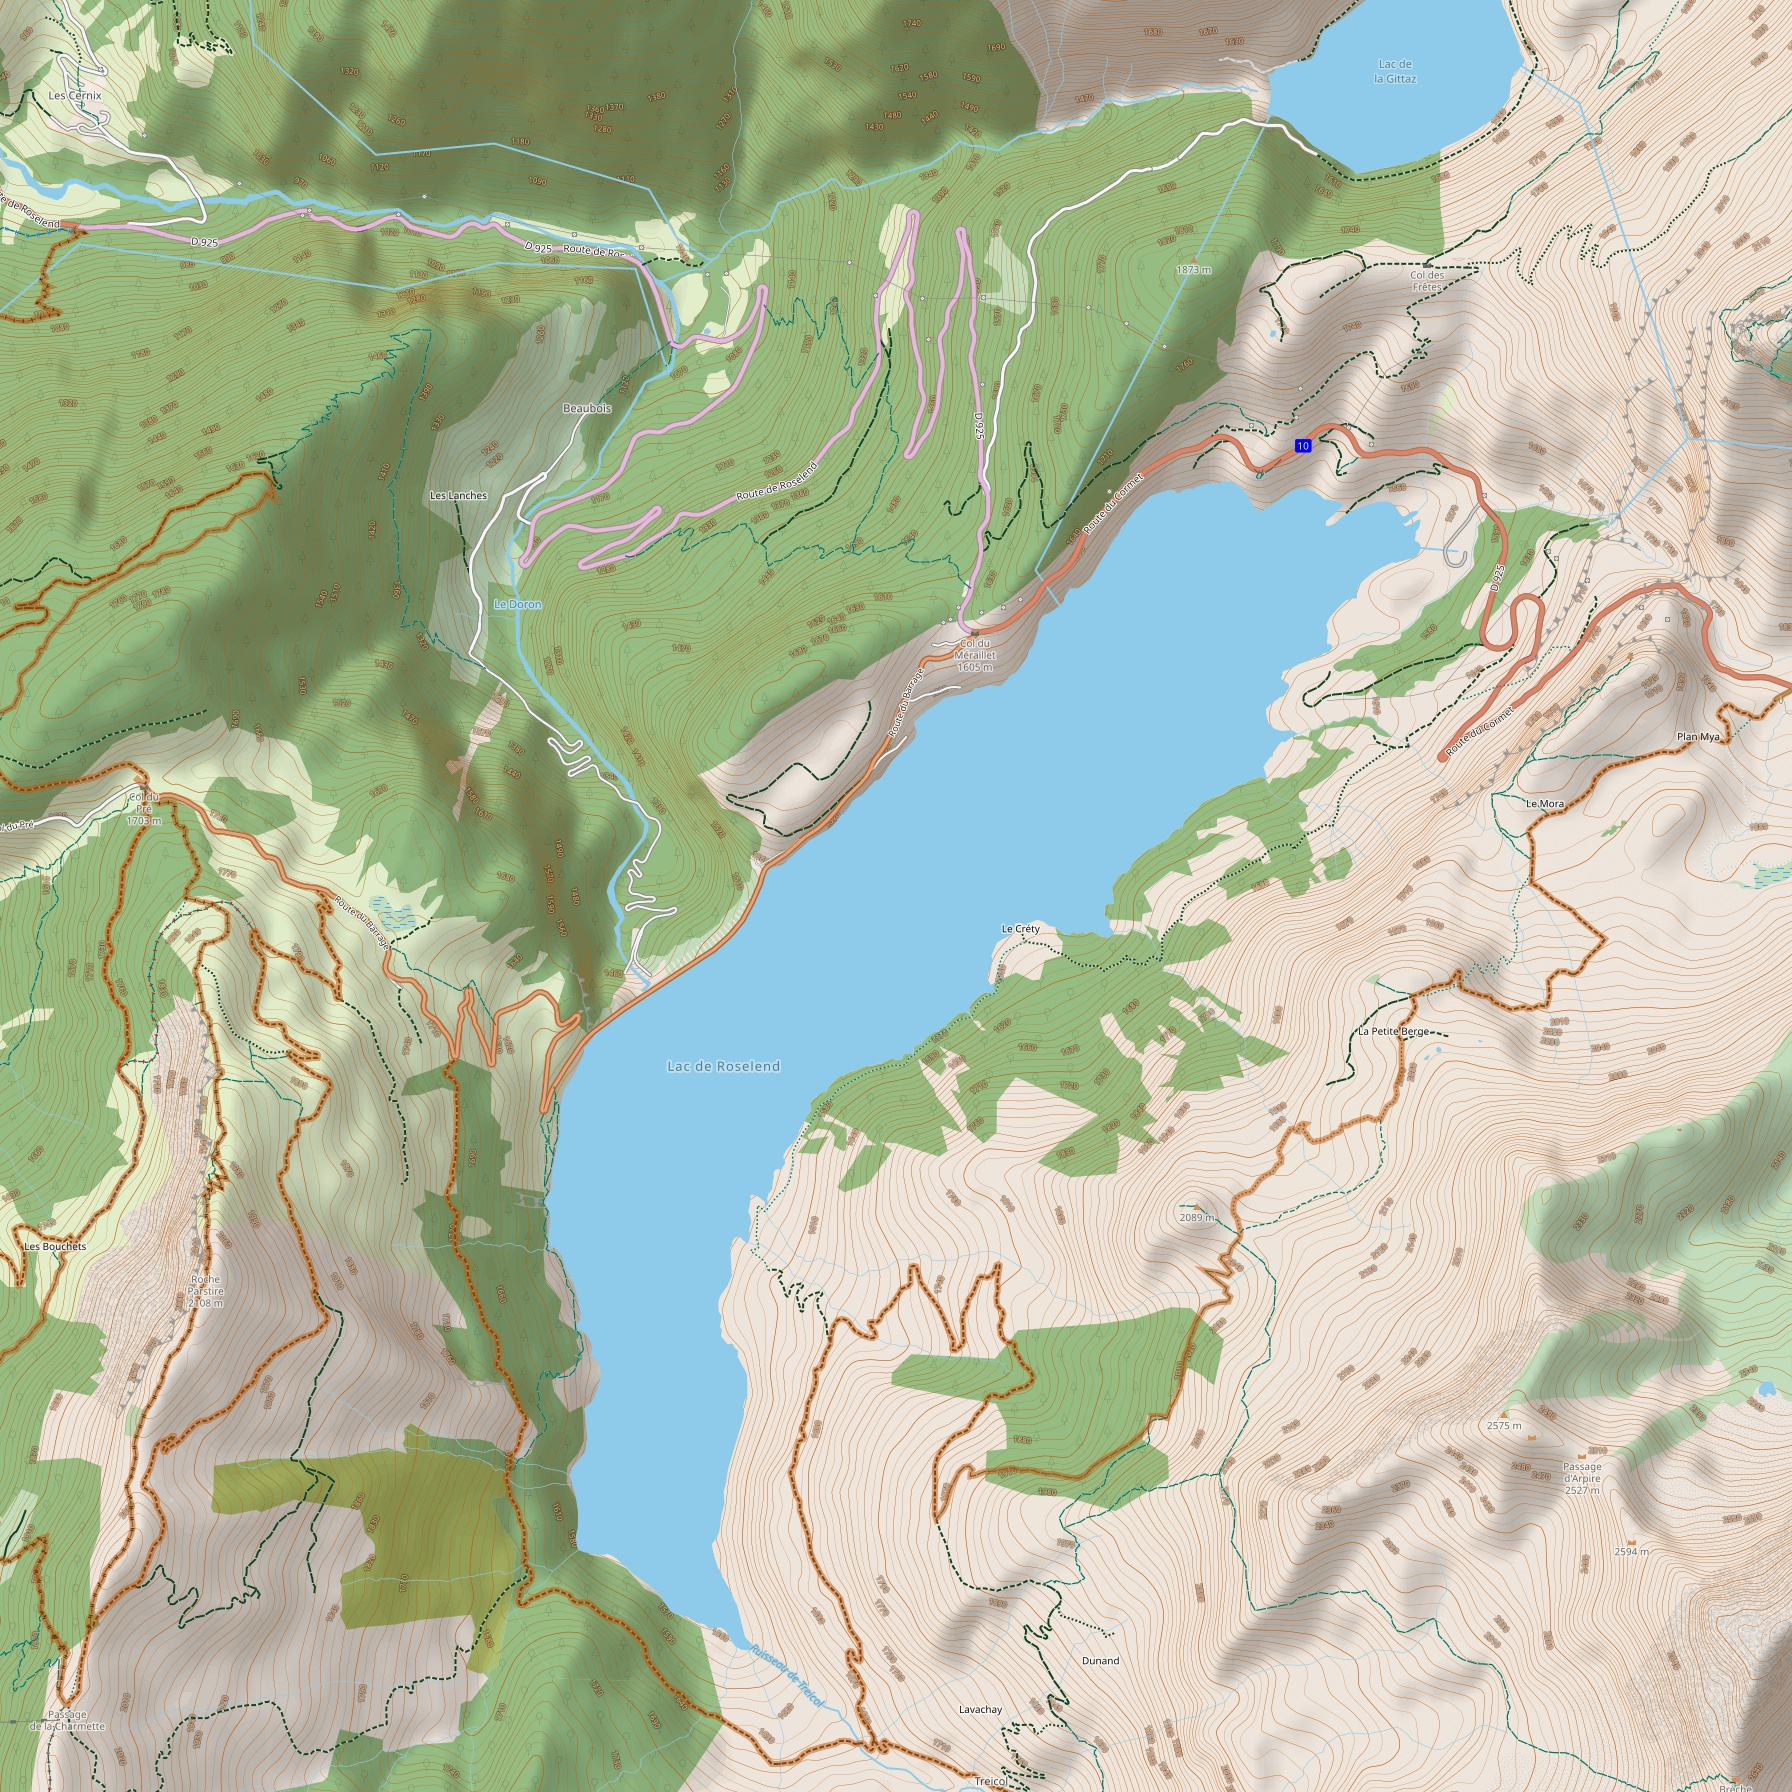

In [3]:
#@title Display jpg map

from IPython.display import Image

Image(filename='out.jpg')

In [4]:
#@title Download pdf map
from google.colab import files
files.download('out.pdf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>